# Great_Customer_prediction

## Importing Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')


## Read data

In [4]:
data=pd.read_csv('https://raw.githubusercontent.com/subashgandyer/datasets/main/great_customers.csv')
data

,user_id,age,workclass,salary,education_rank,marital-status,occupation,race,sex,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,great_customer_class
0,1004889,14.0,private,70773.00,9,Never-married,sales,not_caucasian,Male,0.0,0.0,40,399.0,NaN,0
1,1012811,25.0,private,76597.00,9,Divorced,sales,caucasian,Female,0.0,0.0,30,256.0,NaN,0
2,1006870,21.0,private,47947.25,10,Never-married,clerical,caucasian,Female,0.0,0.0,10,442.0,276.0,0
3,1022149,23.0,private,41740.25,7,Divorced,sales,caucasian,Female,0.0,0.0,20,NaN,NaN,0
4,1029558,26.0,private,NaN,9,Married,sales,not_caucasian,Male,NaN,0.0,36,NaN,120.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,1016807,42.0,private,55293.00,13,Married,executive,caucasian,Male,0.0,NaN,40,277.0,268.0,1
13595,1038859,58.0,self_employed,25928.25,14,Married,sales,caucasian,Male,0.0,0.0,40,337.0,NaN,1
13596,1041214,75.0,self_employed,16590.00,7,Married,executive,caucasian,Male,NaN,0.0,35,NaN,NaN,1
13597,1038013,45.0,private,25536.75,11,Divorced,executive,caucasian,Male,0.0,0.0,40,99.0,79.0,1


# Checking data Imbalance

<AxesSubplot:ylabel='great_customer_class'>

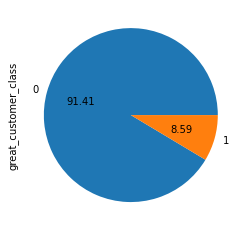

In [5]:
data.great_customer_class.value_counts().plot.pie(autopct='%.2f')

Data is heavily imbalanced

When working with imbalanced data, we don’t recommend using categorical accuracy as the main evaluation measure. It is not unusual to observe a high evaluation accuracy when testing a classification model trained on very imbalanced data. 

# Performance Metric

Precision/Specificity: how many selected instances are relevant.
    
Recall/Sensitivity: how many relevant instances are selected.
    
F1 score: harmonic mean of precision and recall.
    
AUC: relation between true-positive rate and false positive rate

Confusion Matrix

In [6]:
data.head(5)

,user_id,age,workclass,salary,education_rank,marital-status,occupation,race,sex,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,great_customer_class
0,1004889,14.0,private,70773.00,9,Never-married,sales,not_caucasian,Male,0.0,0.0,40,399.0,NaN,0
1,1012811,25.0,private,76597.00,9,Divorced,sales,caucasian,Female,0.0,0.0,30,256.0,NaN,0
2,1006870,21.0,private,47947.25,10,Never-married,clerical,caucasian,Female,0.0,0.0,10,442.0,276.0,0
3,1022149,23.0,private,41740.25,7,Divorced,sales,caucasian,Female,0.0,0.0,20,NaN,NaN,0
4,1029558,26.0,private,NaN,9,Married,sales,not_caucasian,Male,NaN,0.0,36,NaN,120.0,0


# Shape

In [7]:
data.shape

(13599, 15)

# Features

In [8]:
data.columns

Index(['user_id', 'age', 'workclass', 'salary', 'education_rank',
       'marital-status', 'occupation', 'race', 'sex', 'mins_beerdrinking_year',
       'mins_exercising_year', 'works_hours', 'tea_per_year',
       'coffee_per_year', 'great_customer_class'],
      dtype='object')

# check the missing values

In [9]:
data.isna().sum()


user_id                      0
age                        421
workclass                  543
salary                     422
education_rank               0
marital-status               0
occupation                 543
race                         0
sex                          0
mins_beerdrinking_year     424
mins_exercising_year       421
works_hours                  0
tea_per_year              2429
coffee_per_year           2411
great_customer_class         0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13599 entries, 0 to 13598
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 13599 non-null  int64  
 1   age                     13178 non-null  float64
 2   workclass               13056 non-null  object 
 3   salary                  13177 non-null  float64
 4   education_rank          13599 non-null  int64  
 5   marital-status          13599 non-null  object 
 6   occupation              13056 non-null  object 
 7   race                    13599 non-null  object 
 8   sex                     13599 non-null  object 
 9   mins_beerdrinking_year  13175 non-null  float64
 10  mins_exercising_year    13178 non-null  float64
 11  works_hours             13599 non-null  int64  
 12  tea_per_year            11170 non-null  float64
 13  coffee_per_year         11188 non-null  float64
 14  great_customer_class    13599 non-null

## Checking the missing value percentage

In [11]:
for i in range(len(data.columns)):
    missing_data = data[data.columns[i]].isna().sum()
    perc = missing_data / len(data) * 100
    print(f'Feature {i+1} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')

Feature 1 >> Missing entries: 0  |  Percentage: 0.0
Feature 2 >> Missing entries: 421  |  Percentage: 3.1
Feature 3 >> Missing entries: 543  |  Percentage: 3.99
Feature 4 >> Missing entries: 422  |  Percentage: 3.1
Feature 5 >> Missing entries: 0  |  Percentage: 0.0
Feature 6 >> Missing entries: 0  |  Percentage: 0.0
Feature 7 >> Missing entries: 543  |  Percentage: 3.99
Feature 8 >> Missing entries: 0  |  Percentage: 0.0
Feature 9 >> Missing entries: 0  |  Percentage: 0.0
Feature 10 >> Missing entries: 424  |  Percentage: 3.12
Feature 11 >> Missing entries: 421  |  Percentage: 3.1
Feature 12 >> Missing entries: 0  |  Percentage: 0.0
Feature 13 >> Missing entries: 2429  |  Percentage: 17.86
Feature 14 >> Missing entries: 2411  |  Percentage: 17.73
Feature 15 >> Missing entries: 0  |  Percentage: 0.0


# Visualizing the missing values

<AxesSubplot:>

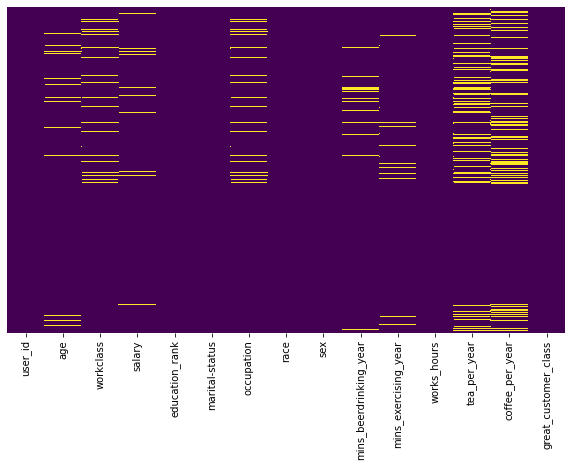

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(), cbar=False, cmap='viridis', yticklabels=False)

## Handling categorical Missing Values

In [13]:
data['workclass']= data['workclass'].fillna('U')
data['occupation']= data['occupation'].fillna('U')

In [14]:
data.isnull().sum()

user_id                      0
age                        421
workclass                    0
salary                     422
education_rank               0
marital-status               0
occupation                   0
race                         0
sex                          0
mins_beerdrinking_year     424
mins_exercising_year       421
works_hours                  0
tea_per_year              2429
coffee_per_year           2411
great_customer_class         0
dtype: int64

## Handling numerical missing values

In [15]:
from numpy import NaN
data[['age','salary','mins_beerdrinking_year','mins_exercising_year','tea_per_year','coffee_per_year']] = data[['age','salary','mins_beerdrinking_year','mins_exercising_year','tea_per_year','coffee_per_year']].replace(0, NaN)

In [16]:
data.fillna(data.mean(), inplace=True)
data

,user_id,age,workclass,salary,education_rank,marital-status,occupation,race,sex,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,great_customer_class
0,1004889,14.0,private,70773.000000,9,Never-married,sales,not_caucasian,Male,10928.433333,1849.509146,40,399.000000,359.708169,0
1,1012811,25.0,private,76597.000000,9,Divorced,sales,caucasian,Female,10928.433333,1849.509146,30,256.000000,359.708169,0
2,1006870,21.0,private,47947.250000,10,Never-married,clerical,caucasian,Female,10928.433333,1849.509146,10,442.000000,276.000000,0
3,1022149,23.0,private,41740.250000,7,Divorced,sales,caucasian,Female,10928.433333,1849.509146,20,217.276544,359.708169,0
4,1029558,26.0,private,37149.297355,9,Married,sales,not_caucasian,Male,10928.433333,1849.509146,36,217.276544,120.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,1016807,42.0,private,55293.000000,13,Married,executive,caucasian,Male,10928.433333,1849.509146,40,277.000000,268.000000,1
13595,1038859,58.0,self_employed,25928.250000,14,Married,sales,caucasian,Male,10928.433333,1849.509146,40,337.000000,359.708169,1
13596,1041214,75.0,self_employed,16590.000000,7,Married,executive,caucasian,Male,10928.433333,1849.509146,35,217.276544,359.708169,1
13597,1038013,45.0,private,25536.750000,11,Divorced,executive,caucasian,Male,10928.433333,1849.509146,40,99.000000,79.000000,1


## Zero Missing Values

In [17]:
data.isnull().sum()

user_id                   0
age                       0
workclass                 0
salary                    0
education_rank            0
marital-status            0
occupation                0
race                      0
sex                       0
mins_beerdrinking_year    0
mins_exercising_year      0
works_hours               0
tea_per_year              0
coffee_per_year           0
great_customer_class      0
dtype: int64

## Handling Categorical data

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
xm=data.apply(LabelEncoder().fit_transform)
xm

,user_id,age,workclass,salary,education_rank,marital-status,occupation,race,sex,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,great_customer_class
0,852,0,2,6028,8,2,10,1,1,85,31,39,399,359,0
1,2279,10,2,6273,8,0,10,0,0,85,31,29,256,359,0
2,1184,6,2,4073,9,2,2,0,0,85,31,9,442,275,0
3,3925,8,2,3145,6,0,10,0,0,85,31,19,217,359,0
4,5215,11,2,2594,8,1,10,1,1,85,31,35,217,119,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,3004,27,2,4991,12,1,5,0,1,85,31,39,277,267,1
13595,6841,44,3,1409,13,1,10,0,1,85,31,39,337,359,1
13596,7247,61,3,731,6,1,5,0,1,85,31,34,217,359,1
13597,6682,31,2,1365,10,0,5,0,1,85,31,39,98,78,1


# Input features

In [20]:
X=xm.iloc[:,:-1]
X

,user_id,age,workclass,salary,education_rank,marital-status,occupation,race,sex,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year
0,852,0,2,6028,8,2,10,1,1,85,31,39,399,359
1,2279,10,2,6273,8,0,10,0,0,85,31,29,256,359
2,1184,6,2,4073,9,2,2,0,0,85,31,9,442,275
3,3925,8,2,3145,6,0,10,0,0,85,31,19,217,359
4,5215,11,2,2594,8,1,10,1,1,85,31,35,217,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,3004,27,2,4991,12,1,5,0,1,85,31,39,277,267
13595,6841,44,3,1409,13,1,10,0,1,85,31,39,337,359
13596,7247,61,3,731,6,1,5,0,1,85,31,34,217,359
13597,6682,31,2,1365,10,0,5,0,1,85,31,39,98,78


## Output Features

In [21]:
y=xm.iloc[:,7]
y

0        1
1        0
2        0
3        0
4        1
        ..
13594    0
13595    0
13596    0
13597    0
13598    0
Name: race, Length: 13599, dtype: int32

## Feature importance

In [22]:
#importing the ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [23]:
model = ExtraTreesClassifier()


In [24]:
model.fit(X,y)

print(model.feature_importances_)

[9.58399485e-03 4.98205730e-03 9.37436076e-03 9.55828866e-03
 5.11159674e-03 4.25195630e-03 6.86879486e-03 9.23297180e-01
 1.01464156e-02 1.14362021e-03 8.46597857e-04 3.11166483e-03
 3.87387740e-03 7.84959434e-03]


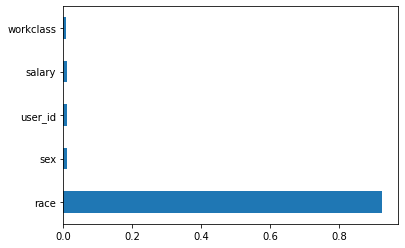

In [25]:
#Top 5 important features
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [26]:
#X.columns
X_new = X[['occupation','user_id','salary','workclass','race']]
X_new

,occupation,user_id,salary,workclass,race
0,10,852,6028,2,1
1,10,2279,6273,2,0
2,2,1184,4073,2,0
3,10,3925,3145,2,0
4,10,5215,2594,2,1
...,...,...,...,...,...
13594,5,3004,4991,2,0
13595,10,6841,1409,3,0
13596,5,7247,731,3,0
13597,5,6682,1365,2,0


# Split data

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.30, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9519, 5)
(4080, 5)
(9519,)
(4080,)


In [28]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X,y)

# summarize class distribution
print("After oversampling: ",Counter(y_train_over))

Undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_train_under, y_train_under = Undersample.fit_resample(X,y)

# summarize class distribution
print("After Undersampling: ",Counter(y_train_under))
X_combined_sampling, y_combined_sampling = Undersample.fit_resample(X_train_over, y_train_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

After oversampling:  Counter({1: 12313, 0: 12313})
After Undersampling:  Counter({0: 1286, 1: 1286})
Combined Random Sampling: Counter({0: 12313, 1: 12313})


# Model Building

# KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
print(knn_classifier.score(X_test, y_test))
print(knn_classifier.score(X_train, y_train))

0.8950980392156863
0.9097594285113982


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,knn_predictions)

array([[3635,   57],
       [ 371,   17]], dtype=int64)

In [35]:

knn_classifier_n = KNeighborsClassifier()
knn_classifier_n.fit(X_train_over, y_train_over)

KNeighborsClassifier()

In [38]:
knn_predictions1 = knn_classifier_n.predict(X_test)
print(knn_classifier_n.score(X_test, y_test))
print(knn_classifier_n.score(X_train_over, y_train_over))

ValueError: query data dimension must match training data dimension

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,knn_predictions1)

In [39]:
model1=knn_classifier.fit(X_train_under, y_train_under)


In [40]:
knn_predictions_new = knn_classifier.predict(X_test)
print(knn_classifier.score(X_test, y_test))
print(knn_classifier.score(X_train_under, y_train_under))

ValueError: query data dimension must match training data dimension

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,knn_predictions_new)

In [ ]:
knn_classifier.fit(X_combined_sampling, y_combined_sampling)

In [ ]:
knn_predictions_new1 = knn_classifier.predict(X_test)
print(knn_classifier.score(X_test, y_test))
print(knn_classifier.score(X_combined_sampling, y_combined_sampling))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,knn_predictions_new1)

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params= {'n_neighbors':[3,5,11,19],'weights':['uniform','distance'],'metric':['euclidean','manhattan']
             }

In [ ]:
gridsearch= GridSearchCV(knn_classifier,grid_params, verbose=1,cv=3,n_jobs=-1)

In [ ]:
gs_results_knn=gridsearch.fit(X_combined_sampling, y_combined_sampling)

In [ ]:
print(gs_results_knn.best_score_)
print(knn_classifier.score(X_combined_sampling, y_combined_sampling))

In [ ]:
gs_results_knn.best_estimator_

In [ ]:
gs_results_knn.best_params_

In [ ]:
knn_pred=knn_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_new,knn_pred)

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
print(rf_classifier.score(X_test, y_test))
print(rf_classifier.score(X_train, y_train))

1.0
1.0


In [ ]:
#overfitting

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,rf_predictions)


In [ ]:
#RandomForest with randomSearchCv

In [ ]:
RSEED=50
rf = RandomForestClassifier(random_state= RSEED)
from pprint import pprint
# Look at parameters used by our current forest

#print('Parameters currently in use:\n')
pprint(rf.get_params())

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']+list(np.arange(0.5, 1, 0.1))
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 20, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=RSEED,n_jobs = -1)


In [ ]:
rf_random.fit(X_train, y_train)

In [ ]:
print(rf_random.best_params_)

In [ ]:
random_cv=rf_random.best_estimator_
random_cv

In [ ]:
y_pred1 = random_cv.predict(X_test)
y_pred1

In [ ]:
print(random_cv.score(X_test,y_test))
print(random_cv.score(X_train,y_train))

#RandomForest with Oversampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X,y)

# summarize class distribution
print("After oversampling: ",Counter(y_train_over))

Undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_train_under, y_train_under = Undersample.fit_resample(X,y)

# summarize class distribution
print("After oversampling: ",Counter(y_train_under))
X_combined_sampling, y_combined_sampling = Undersample.fit_resample(X_train_over, y_train_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [ ]:
# fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X,y)

# summarize class distribution
print("After oversampling: ",Counter(y_train_over))

In [ ]:
rf_random.fit(X_train_over, y_train_over)

In [ ]:
random_cv_new1=rf_random.best_estimator_
random_cv_new1

In [ ]:
print(random_cv_new1.score(X_test,y_test))
print(random_cv_new1.score(X_train_over,y_train_over))

In [ ]:
Undersample = RandomUnderSampler(sampling_strategy='majority')

In [ ]:
# fit and apply the transform
X_train_under, y_train_under = Undersample.fit_resample(X,y)

# summarize class distribution
print("After oversampling: ",Counter(y_train_under))

In [ ]:
rf_random.fit(X_train_under, y_train_under)

In [ ]:
random_cv_new=rf_random.best_estimator_
random_cv_new

In [ ]:
print(random_cv_new.score(X_test,y_test))
print(random_cv_new.score(X_train_under,y_train_under))

In [ ]:
X_combined_sampling, y_combined_sampling = Undersample.fit_resample(X_train_over, y_train_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

In [ ]:
ax=y_combined_sampling.value_counts().plot.pie(autopct='%.2f')

In [ ]:
rf_random.fit(X_combined_sampling, y_combined_sampling)

In [ ]:
random_cv_combined=rf_random.best_estimator_
random_cv_combined

In [ ]:
print(random_cv_combined.score(X_test,y_test))
print(random_cv_combined.score(X_combined_sampling, y_combined_sampling))

# Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=5)


model = LogisticRegression()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))
print(model.score(X_train, y_train))
lr_predictions=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,lr_predictions)

In [ ]:
combined_model = LogisticRegression()
combined_model.fit(X_train_under, y_train_under)

In [ ]:
print(combined_model.score(X_test, y_test))
print(combined_model.score(X_train_under, y_train_under))

In [ ]:
from sklearn.metrics import confusion_matrix
lr_predictions_new=model.predict(X_test)
confusion_matrix(y_test,lr_predictions_new)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
# Create grid search object
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
lg = grid_search.fit(X_combined_sampling, y_combined_sampling)

In [ ]:
lg.best_score_

# SVM

In [42]:
from sklearn import svm
Sv_Classifier= svm.SVC()


In [43]:
Sv_Classifier.fit(X_combined_sampling, y_combined_sampling)


SVC()

In [44]:
Sv_predictions = Sv_Classifier.predict(X_test)


ValueError: X.shape[1] = 5 should be equal to 14, the number of features at training time

In [ ]:
print(Sv_Classifier.score(X_test, y_test))
print(Sv_Classifier.score(X_combined_sampling, y_combined_sampling))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Sv_predictions)

# Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()



In [ ]:
nb=gnb.fit(X_combined_sampling, y_combined_sampling)
nb

In [ ]:
y_pred = gnb.predict(X_test)
y_pred


In [ ]:
print(gnb.score(X_test, y_test))
print(gnb.score(X_combined_sampling, y_combined_sampling))

In [ ]:
#overfitting

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

# Conclusion

Random forest and naive bayes models are overfitting due to imbalanced data. It can be reduced by sampling techniques.Also,we can randomized search cv to find the best parametre

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('knn', model3)], voting='hard')

In [ ]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression    : {:.04}%       {:.04}%'.format( model.score(X_test, y_test)* 100,\
                                                  100-(model.score(X_test, y_test) * 100)))

print('KNN                    : {:.04}%       {:.04}% '.format(knn_classifier.score(X_test, y_test) * 100,\
                                                        100-(knn_classifier.score(X_test, y_test) * 100)))

print('Random Forest          : {:.04}%       {:.04}% '.format(rf_classifier.score(X_test, y_test)* 100,\
                                                           100-(rf_classifier.score(X_test, y_test)* 100)))
print('Naivebayes             : {:.04}%      {:.04}% '.format(gnb.score(X_test, y_test)* 100,\
                                                           100-(gnb.score(X_test, y_test)* 100)))
print('Support Vector Machine : {:.04}%     {:.04}% '.format(Sv_Classifier.score(X_test, y_test)* 100,\
                                                           100-(Sv_Classifier.score(X_test, y_test)* 100)))